In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from models import ols_regression, manhattan_linear, gc

In [ ]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [ ]:
nr_people_pop1 = 50
nr_people_pop2 = 10
nr_people_pop3 = 10

total_humans = nr_people_pop1+ nr_people_pop2  + nr_people_pop3
minaf_pop1 = 0.8
minaf_pop2 = 0
minaf_pop3 = 0

majaf_pop1 = 0.1
majaf_pop2 = 0.7
majaf_pop3 = 0.2


hetaf_pop1 = np.round(1 - minaf_pop1 - majaf_pop1,1)
hetaf_pop2 = np.round(1 - minaf_pop2 - majaf_pop2,1)
hetaf_pop3 = np.round(1 - minaf_pop3 - majaf_pop3,1)

pheno_pop1 = 1
pheno_pop2 = -1
pheno_pop3 = 20

In [ ]:
hetaf_pop2

In [ ]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [ ]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [ ]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [ ]:
humans = pd.DataFrame()
humans['snp'] = snps
humans = pd.get_dummies(humans, columns=['snp'], dtype=int)
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [ ]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [ ]:
humans

In [ ]:
pheno_pop1 = humans[humans['pop']=='pop1']['risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['risk'].mean()

In [ ]:
humans['risk'] = humans['risk']-humans['risk'].mean()

In [13]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

1.9652061855670104


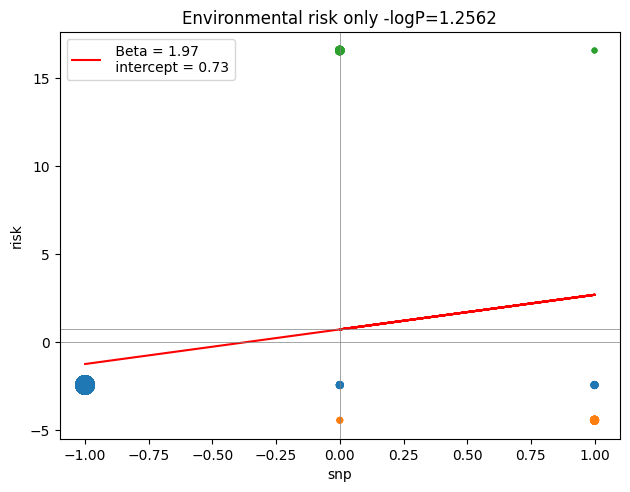

In [14]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# correction

# Predicted by p2-q2

In [15]:
humans['snp_mean'] = humans['majaf'] - humans['minaf']
X = humans[['snp_mean']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_mean']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_mean']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_maf_only'] = model.predict(X)

4.326241134751774


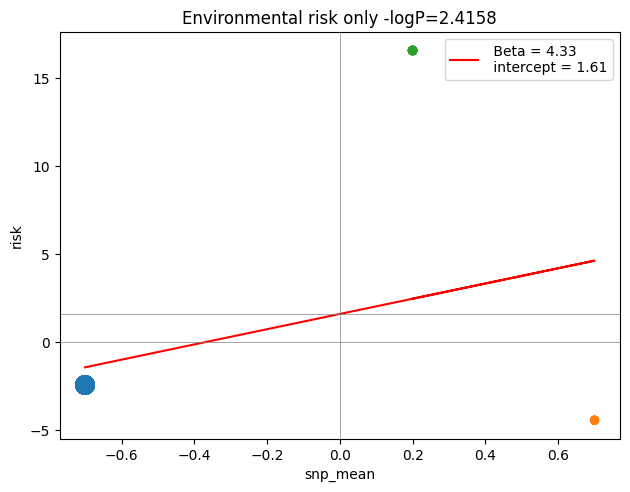

In [16]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_mean', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_mean'], humans['predicted_risk_maf_only'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# X-X_mean

In [17]:
humans['snp_shifted'] = humans['snp'] - humans['snp_mean']

In [18]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

-1.6653345369377348e-16


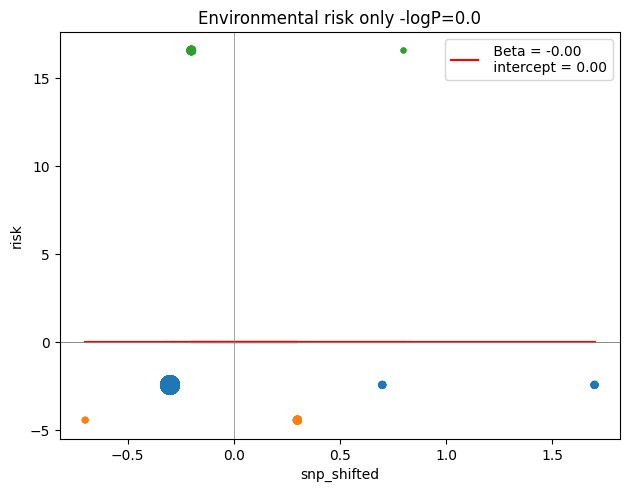

In [19]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [20]:
# min predicted risk maf only

In [21]:
humans['risk_shifted'] = humans['risk']-humans['predicted_risk_maf_only']

In [22]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['risk_shifted']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

-1.1102230246251565e-16


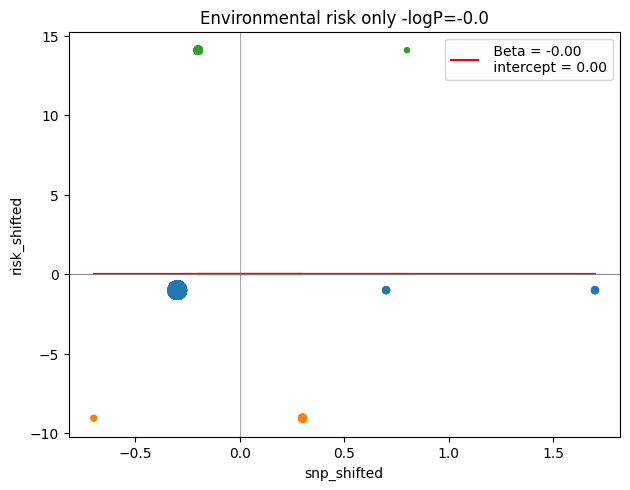

In [23]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='risk_shifted', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Add effect

# No corr

In [24]:
humans['causal'] = humans['snp']

In [25]:
X = humans[['snp']]  # Predictor variable
y = humans['causal']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

1.0


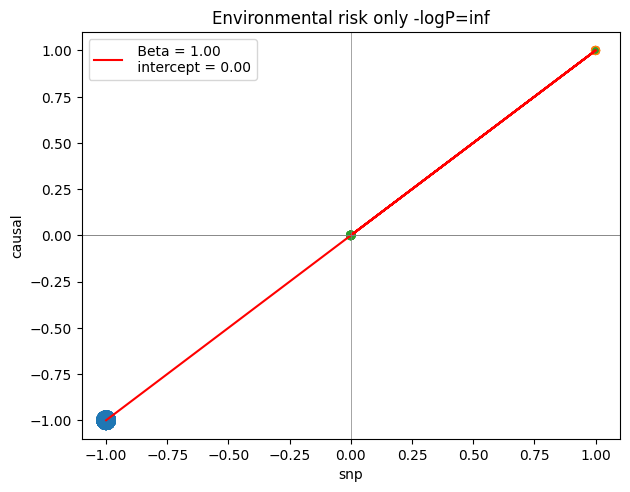

In [26]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='causal', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Only X_mean

In [27]:
humans['snp_mean'] = humans['majaf'] - humans['minaf']
X = humans[['snp_mean']]  # Predictor variable
y = humans['causal']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_mean']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_mean']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_causal_maf_only'] = model.predict(X)

1.0


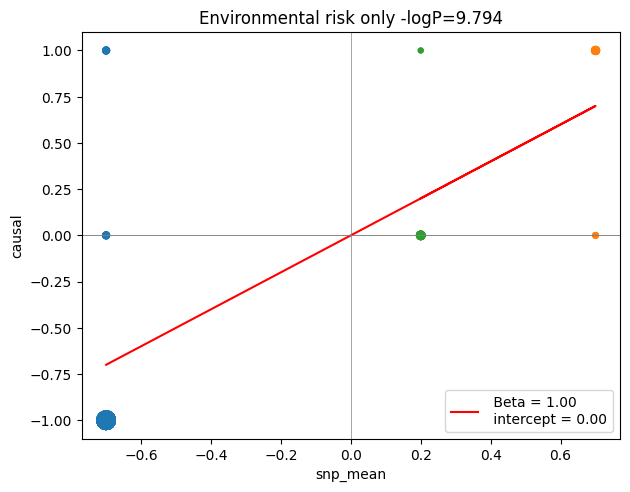

In [28]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_mean', y='causal', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_mean'], humans['predicted_causal_maf_only'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# X-X_mean

In [29]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['causal']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.9999999999999998


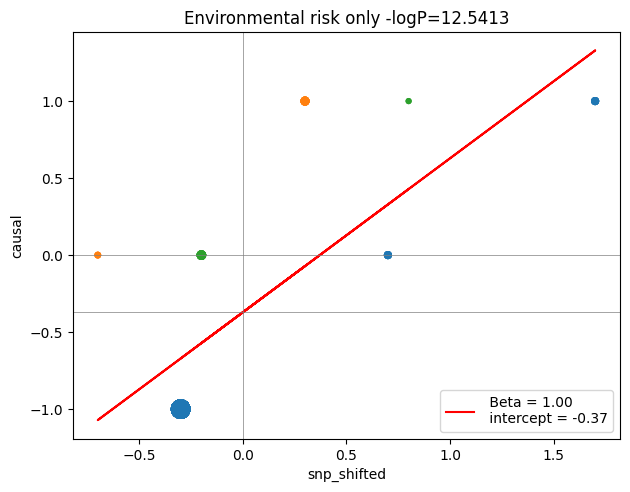

In [30]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='causal', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [31]:
#values for p min q

In [32]:
humans['causal_risk_corrected'] = humans['causal'] - humans['predicted_causal_maf_only']

In [33]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['causal_risk_corrected']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)


# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.9999999999999998


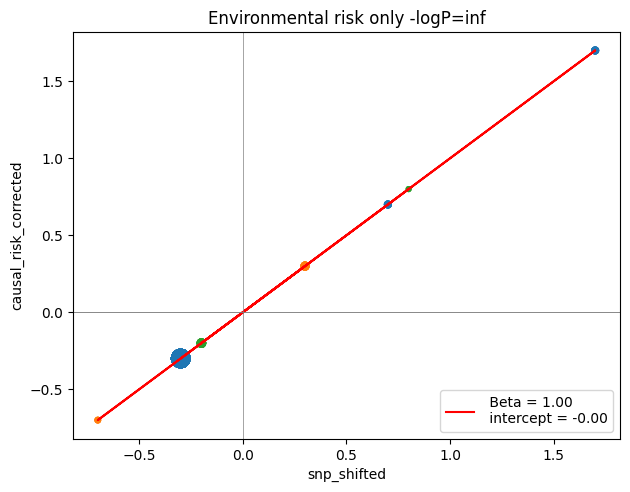

In [34]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='causal_risk_corrected', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Combinaison

In [35]:
humans['combi'] = humans['risk'] + humans['causal']

# No correction

In [36]:
X = humans[['snp']]  # Predictor variable
y = humans['combi']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

2.9652061855670104


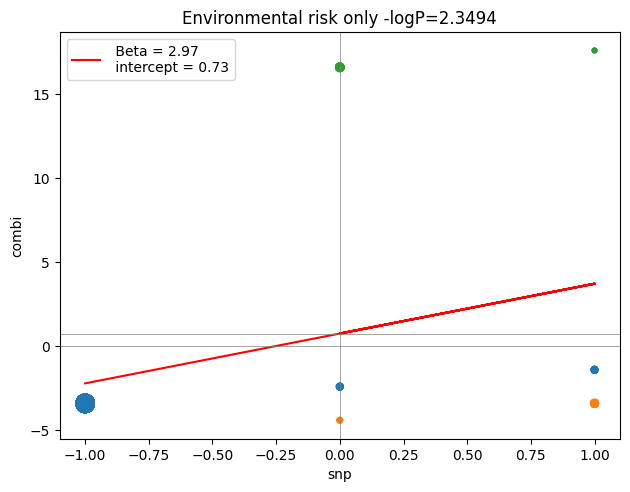

In [37]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='combi', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [38]:
# X_mean only

In [39]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,risk,predicted_risk,snp_mean,predicted_risk_maf_only,snp_shifted,risk_shifted,causal,predicted_causal_maf_only,causal_risk_corrected,combi
0,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-2.235272,-0.7,-1.421479,-0.3,-1.007092,-1,-0.7,-0.3,-3.428571
1,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-2.235272,-0.7,-1.421479,-0.3,-1.007092,-1,-0.7,-0.3,-3.428571
2,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-2.235272,-0.7,-1.421479,-0.3,-1.007092,-1,-0.7,-0.3,-3.428571
3,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-2.235272,-0.7,-1.421479,-0.3,-1.007092,-1,-0.7,-0.3,-3.428571
4,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-2.235272,-0.7,-1.421479,-0.3,-1.007092,-1,-0.7,-0.3,-3.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,2.472138,-0.2,14.099291,0,0.2,-0.2,16.571429
66,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,2.472138,-0.2,14.099291,0,0.2,-0.2,16.571429
67,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,2.472138,-0.2,14.099291,0,0.2,-0.2,16.571429
68,0,0,1,1,0.05,0.0,0.8,0.2,pop3,10,16.571429,3.695140,0.2,2.472138,0.8,14.099291,1,0.2,0.8,17.571429


In [40]:
X = humans[['snp_mean']]  # Predictor variable
y = humans['combi']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_mean']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_mean']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_combi'] = model.predict(X)

5.326241134751774


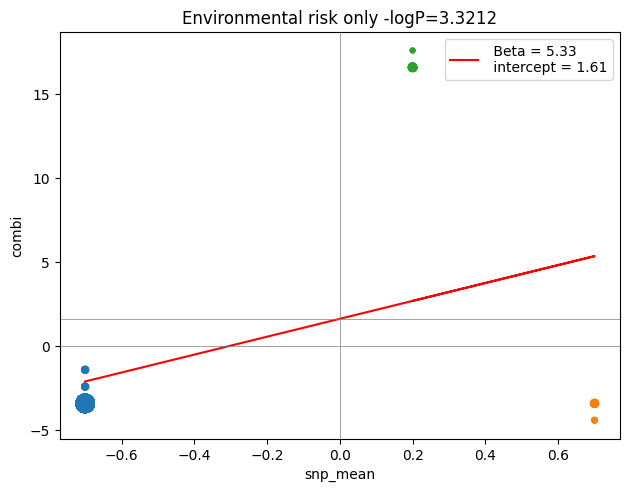

In [41]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_mean', y='combi', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_mean'], humans['predicted_risk_combi'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# SNP shifted

In [42]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['combi']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.9999999999999987


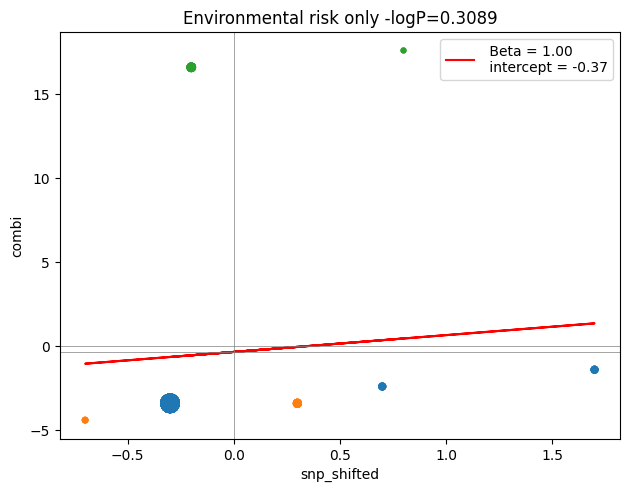

In [43]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='combi', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [44]:
# y - y_pred

In [45]:
humans['combi_shifted'] = humans['combi'] - humans['predicted_risk_combi']

In [46]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['combi_shifted']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.9999999999999996


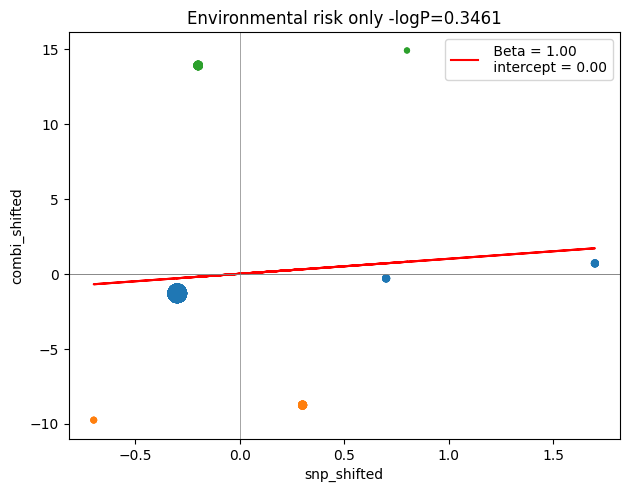

In [48]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='combi_shifted', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()